# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style('whitegrid')

# Import Dataset

In [3]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.shape

(10000, 6)

# Data Munging

In [6]:
df.drop_duplicates()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
df['Extracurricular Activities'].replace(['Yes', 'No'], [1,0], inplace=True)

# Creating Model

In [8]:
X = df.iloc[:,0:5]
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [9]:
y = df.iloc[:,-1]
y.head()

0 91.0
1 65.0
2 45.0
3 36.0
4 66.0
Name: Performance Index, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80/20 split

In [11]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6614,5,95,0,8,8
3992,2,78,1,8,2
4295,5,44,1,9,8
4480,4,81,1,5,4
4517,5,98,0,4,0
...,...,...,...,...,...
8636,2,58,1,9,8
9417,7,98,1,7,5
7874,4,81,0,7,6
994,7,60,1,9,3


In [12]:
y_train

6614 81.0
3992 58.0
4295 33.0
4480 63.0
4517 78.0
 ... 
8636 35.0
9417 88.0
7874 66.0
994 48.0
334 30.0
Name: Performance Index, Length: 8000, dtype: float64

In [13]:
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(X_train,y_train)

In [14]:
scores= pd.DataFrame(fit.scores_)
columns= pd.DataFrame(X_train.columns)

In [15]:
features_scores= pd.concat([columns, scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
3,Sleep Hours,49.414262
2,Extracurricular Activities,56.442944
4,Sample Question Papers Practiced,167.780875
0,Hours Studied,2193.176240
1,Previous Scores,29629.711316


In [16]:
X_train = X_train[['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced']]
X_test = X_test[['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced']]

In [17]:
model = linear_model.LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

# Predicting using Values

In [18]:
# regr.predict(Previous Score, Hours Studied, Sample Question Papers)

predicted = model.predict([[95, 6, 0]])
print(predicted)

[83.24147751]


# Testing

In [19]:
y_pred_mlr= model.predict(X_test.values)

In [20]:
compare = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
compare.head()

,Actual value,Predicted value
5192,76.0,78.098593
4904,39.0,37.787288
984,53.0,54.334852
1628,33.0,31.297885
3552,29.0,30.594672


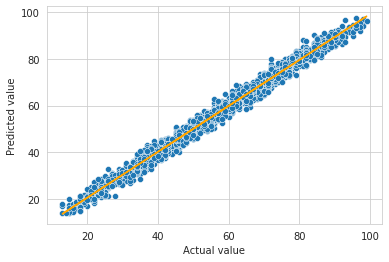

In [22]:
x_plot = compare['Actual value']
y_plot = compare['Predicted value']

a, b = np.polyfit(x_plot, y_plot, 1)

sns.scatterplot(compare, x = 'Actual value', y = 'Predicted value')

plt.plot(x_plot, a * x_plot + b, color = 'orange')

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(x_plot, y_plot)

0.03542404179579226